In [30]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [32]:
data = pd.read_csv('../input/creditcardfraud/creditcard.csv')

In [33]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [34]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


The Algo

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score

In [36]:
# divide data into features and targets
X= data.iloc[:,0:30]
Y= data.iloc[:,30]

# split the data into test and train 
X_train,X_test,y_train,y_test= train_test_split(X,Y, test_size=0.3, random_state=100)

In [37]:
#set up and using the model- 'gini'=>impurity measure ; max_depth=>  ; min_samples_leaf=>kitni leaf
dtree= DecisionTreeClassifier(criterion='gini',max_depth=10, random_state=100, min_samples_leaf=10)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, random_state=100)

In [38]:
prediction= dtree.predict(X_test)
acc = accuracy_score(y_test,prediction)
print("Decision Tree accuracy:",acc*100)

Decision Tree accuracy: 99.92626663389628


In [39]:
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [40]:
score= round(acc,3)
print(classification_report(y_test, prediction))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.81      0.73      0.77       142

    accuracy                           1.00     85443
   macro avg       0.90      0.87      0.88     85443
weighted avg       1.00      1.00      1.00     85443



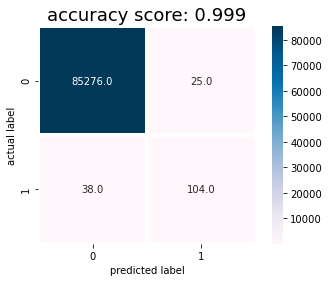

In [41]:
cm1=cm(y_test,prediction)
sns.heatmap(cm1, annot=True,fmt=".1f",linewidths=3,square=True, cmap='PuBu',color="#cd1076")
plt.xlabel('predicted label')
plt.ylabel('actual label')
plt.title('accuracy score: {0}'.format(score), size=18)
plt.show()

# **cohen-kappa-score**

    0 indicates no information agreement
    0.01-0.20 Slight agreement
    0.21-0.40 Fair agreement
    0.41-0.60 Moderate agreement
    0.61-0.80 Substantial agreement
    0.81-1.00 Almost perfect agreement


In [42]:
cohen_kappa= cohen_kappa_score(y_test, prediction)*100
print('cohen kappa score is', cohen_kappa)

cohen kappa score is 76.71592739243349


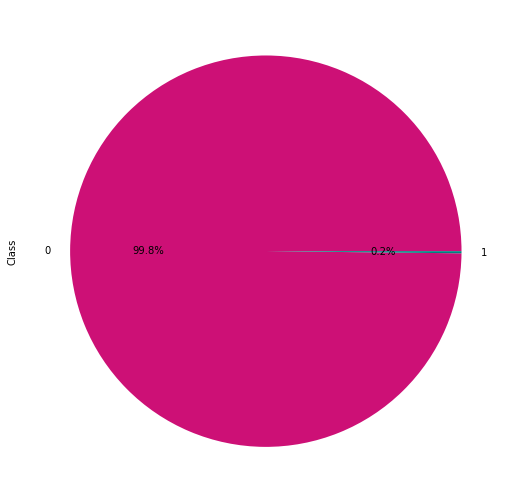

In [43]:
#check if dataset is imbalanced
data['Class'].value_counts().plot(kind='pie',colors=['#cd1076', '#008080'],autopct='%1.1f%%',figsize=(9,9))

In [44]:
varValue = data.Class.value_counts()
print(varValue)

0    284315
1       492
Name: Class, dtype: int64


Of the 284,807 rows, only 492 were categorized as fraud.
This is an imbalanced dataset

In [45]:
#balancing using upsampling
from sklearn.utils import resample
df_maj= data.loc[data.Class==0].copy()
df_min= data.loc[data.Class==1].copy()

df_min_upsampled = resample(df_min,replace=True,n_samples=284315, random_state=123)
df_upsampled= pd.concat([df_maj, df_min_upsampled])

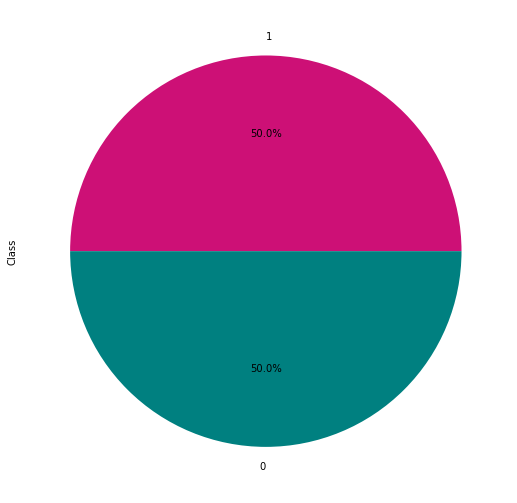

In [46]:
df_upsampled['Class'].value_counts().plot(kind='pie',colors=['#cd1076', '#008080'],autopct='%1.1f%%',figsize=(9,9))

In [47]:
varValue = df_upsampled.Class.value_counts()
print(varValue)


1    284315
0    284315
Name: Class, dtype: int64


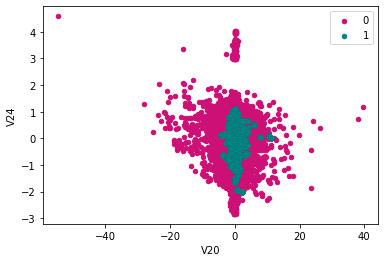

In [48]:
colors = {0:'#cd1076', 1:'#008080'}
fig, ax = plt.subplots()
grouped = df_upsampled.groupby('Class')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter'
               ,x='V20', y='V24', label=key
               ,color=colors[key])
plt.show()

In [49]:
print(df_upsampled.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [50]:
from sklearn.ensemble import IsolationForest
from collections import Counter
rs=np.random.RandomState(0)
clf = IsolationForest(max_samples=100,random_state=rs, contamination=.1) 
clf.fit(df_upsampled)
y_pred_train = clf.predict(df_upsampled)
sayı = Counter(y_pred_train).keys()
print(sayı)

dict_keys([1, -1])


In [51]:
if_scores = clf.decision_function(df_upsampled)
if_anomalies=clf.predict(df_upsampled)
if_anomalies=pd.Series(if_anomalies).replace([-1,1],[1,0])
#if_anomalies=df_upsampled[if_anomalies==1];
print(type(if_anomalies))

<class 'pandas.core.series.Series'>


In [52]:
# IQR
Q1 = df_upsampled.quantile(0.25)
Q3 = df_upsampled.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


Time      88709.000000
V1            3.908548
V2            2.953956
V3            5.456948
V4            4.381622
V5            2.267123
V6            1.655679
V7            3.340005
V8            1.069873
V9            2.493786
V10           4.587031
V11           3.784410
V12           5.726501
V13           1.465689
V14           6.867187
V15           1.238269
V16           3.839420
V17           5.556748
V18           2.147876
V19           1.410455
V20           0.625634
V21           0.821255
V22           1.116807
V23           0.432438
V24           0.773187
V25           0.709840
V26           0.612384
V27           0.518208
V28           0.278107
Amount       98.700000
Class         1.000000
dtype: float64


In [53]:
data = df_upsampled[~((df_upsampled < (Q1 - 1.5 * IQR)) |(df_upsampled > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data.shape)

(308157, 31)


## Algorithms:

1. XGBOOST

[0.9991807403766253, 0.9992743700478681, 0.9993914071369217, 0.9994616293903538, 0.9994967405170698, 0.9994967405170698, 0.9994616293903538, 0.9994850368081645, 0.9994616293903538, 0.9994850368081645]


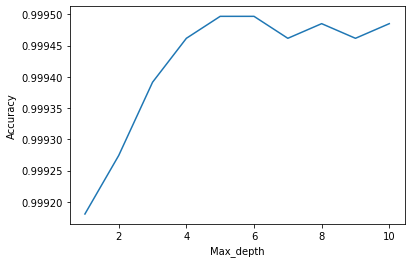

In [54]:
#Manual Tuning

from xgboost import XGBClassifier
accuracy = []
for n in range(1,11):
    xgb =XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.78,
                           colsample_bytree=1, max_depth=n)
    xgb.fit(X_train,y_train)
    prediction = xgb.predict(X_test)
    accuracy.append(accuracy_score(y_test, prediction))
print(accuracy)    
plt.plot(range(1,11), accuracy)
plt.xlabel('Max_depth')
plt.ylabel('Accuracy')
plt.show()

In [55]:
# RandomizeSearchCV

from sklearn.model_selection import RandomizedSearchCV
xgb_params = {
    'learning_rate' : [0.08, 0.06, 0.04, 0.09],      
    'max_depth': range(1,11),
    'n_estimators': [100, 200, 300,500,1000]}
xgb =XGBClassifier()
xgb_randomcv_model=RandomizedSearchCV(estimator=xgb, param_distributions=xgb_params, n_iter=2, cv=5, scoring='accuracy', n_jobs=-1, verbose=2).fit(X_train,y_train)
print(xgb_randomcv_model.best_params_)
print('xgb_randomcv_model accuracy = {}'.format(xgb_randomcv_model.best_score_))


Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  8.5min finished


{'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.09}
xgb_randomcv_model accuracy = 0.9995636123373494


In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import f1_score
                  
X = data.iloc[:, 0:30]
Y = data.iloc[:, 30]
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2, random_state = 100)

accuracies ={}
kappaScores= {}
f1scores={}

In [57]:
from xgboost import XGBClassifier
xgb =XGBClassifier(n_estimators=200, learning_rate=0.08, max_depth=6)
xgb.fit(X_train,y_train)
prediction = xgb.predict(X_test)
acc = accuracy_score(y_test, prediction)*100
print("Xgboost Classifier accuracy:",acc)
accuracies['Xgboost Classifier']=acc

f1=f1_score(y_test,prediction)*100
print("F1 Score: ",f1)
f1scores['Xgboost Classifier']=f1

cohen_kappa = cohen_kappa_score(y_test, prediction)*100
print('Cohen Kappa score: ',cohen_kappa)
kappaScores['Xgboost Classifier']=cohen_kappa

Xgboost Classifier accuracy: 99.9983774662513
F1 Score:  99.99735778265119
Cohen Kappa score:  99.99618705551376


In [2]:
score=round(accuracy_score(y_test,prediction),3)
cm = confusion_matrix
cm1=cm(y_test,prediction)
sns.heatmap(cm1, annot=True,fmt=".1f",linewidths=3,square=True, cmap='PuBu',color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title('XGBOOST Accuracy Score: {0}'.format(score),size=12)
plt.show()

NameError: name 'accuracy_score' is not defined

2. RandomForest:

In [ ]:
# RandomizeSearchCV
from sklearn.ensemble import RandomForestClassifier
rf_params = {'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': range(1,11),
    'min_samples_split': range(1,15,5),
    'n_estimators': [100, 200, 300,500,1000]}
rf=RandomForestClassifier()
rf_randomcv_model=RandomizedSearchCV(estimator=rf, param_distributions=rf_params, n_iter=2, cv=5, scoring='accuracy', n_jobs=-1, verbose=2).fit(X_train,y_train)
print(rf_randomcv_model.best_params_)
print('rf_randomcv_model accuracy score = {}'.format(rf_randomcv_model.best_score_))

In [ ]:
clf = RandomForestClassifier(n_estimators=200,min_samples_split=11,min_samples_leaf=7, max_features=2,max_depth= 80)
clf.fit(X_train,y_train)

prediction = clf.predict(X_test)
acc = accuracy_score(y_test,prediction)*100
print("Random Forest Accuracy:",acc)
accuracies['Random Forest']=acc

f1=f1_score(y_test,prediction)*100
print("F1-Score: ",f1)
f1scores['Random Forest']=f1


cohen_kappa = cohen_kappa_score(y_test, prediction)*100
print('Cohen Kappa score: ',cohen_kappa)
kappaScores['Random Forest']=cohen_kappa


In [ ]:
score=round(accuracy_score(y_test,prediction),3)
cm= confusion_matrix
cm1=cm(y_test,prediction)
sns.heatmap(cm1, annot=True,fmt=".1f",linewidths=3,square=True, cmap='PuBu',color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title('Random Forest accuracy_score: {0}'.format(score),size=12)
plt.show()

3. DecisionTree:

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier(criterion='gini',max_depth=10,random_state=100,min_samples_leaf=10)
dtree.fit(X_train, y_train)
prediction=dtree.predict(X_test)

print(cross_val_score(dtree,X,Y,cv=5))
scores = cross_val_score(dtree, X, Y,scoring='accuracy', cv=10)
print(scores.mean())

In [ ]:
acc = accuracy_score(y_test,prediction)*100
print("Decision Tree Accuracy:",acc)
accuracies['Decision Tree']=acc

f1=f1_score(y_test,prediction)*100
print("F1-Score: ",f1)
f1scores['Decision Tree']=f1


cohen_kappa = cohen_kappa_score(y_test, prediction)*100
print('Cohen Kappa score: ',cohen_kappa)
kappaScores['Decision Tree']=cohen_kappa

In [ ]:
score=round(accuracy_score(y_test,prediction),3)
cm= confusion_matrix
cm1=cm(y_test,prediction)
sns.heatmap(cm1, annot=True,fmt=".1f",linewidths=3,square=True, cmap='PuBu',color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title('Decision Tree Accuracy Score: {0}'.format(score),size=12)
plt.show()


4. LogisticRegression:

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=101,multi_class='ovr',solver='liblinear',class_weight='balanced',C=0.2)
lr.fit(X_train,y_train)
prediction = lr.predict(X_test)
scores = cross_val_score(lr, X, Y, cv=10)
print(scores.mean())

In [ ]:
acc = accuracy_score(y_test,prediction)*100
print("Logistic Regression Accuracy:",acc)
accuracies['Logistic Regression']=acc

f1=f1_score(y_test,prediction)*100
print("F1-Score: ",f1)
f1scores['Logistic Regression']=f1


cohen_kappa = cohen_kappa_score(y_test, prediction)*100
print('Cohen Kappa score: ',cohen_kappa)
kappaScores['Logistic Regression']=cohen_kappa


In [ ]:
score=round(accuracy_score(y_test,prediction),3)
cm= confusion_matrix
cm1=cm(y_test,prediction)
sns.heatmap(cm1, annot=True,fmt=".1f",linewidths=3,square=True, cmap='PuBu',color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title('Logistic Regression Accuracy Score: {0}'.format(score),size=12)
plt.show()

# Accuracy-score comparision:

In [ ]:
colors = ["#00008b", "#00e5ee", "#cd1076", "#008080","#cd5555",'black']

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,101,5))
plt.ylabel("Accuracy %")
plt.xlabel("\n\n Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

# CohenKappa score comparision:

In [ ]:
colors = ["#00008b", "#00e5ee", "#cd1076", "#008080","#cd5555",'black']

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,101,5))
plt.ylabel("Kappa Score %")
plt.xlabel("\n\n Algorithms")
sns.barplot(x=list(kappaScores.keys()), y=list(kappaScores.values()), palette=colors)
plt.show()

# F1 score comparision:

In [ ]:
colors = ["#00008b", "#00e5ee", "#cd1076", "#008080","#cd5555",'black']

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,101,5))
plt.ylabel("F1 Score %")
plt.xlabel("\n\n Algorithms")
sns.barplot(x=list(f1scores.keys()), y=list(f1scores.values()), palette=colors)
plt.show()
